<a href="https://colab.research.google.com/github/cadred000/MAT421/blob/main/Module_B_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dan Gibson - Module B part 2 Homework

If you ever have the need to make a function to fit a list of data points, Python has you covered.  In this assignment, we will explore Lagrange and Newton's Polynomial Interpolation.

## Lagrange Polynomial Interpolation

In [ ]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
plt.style.use('seaborn-v0_8-poster')

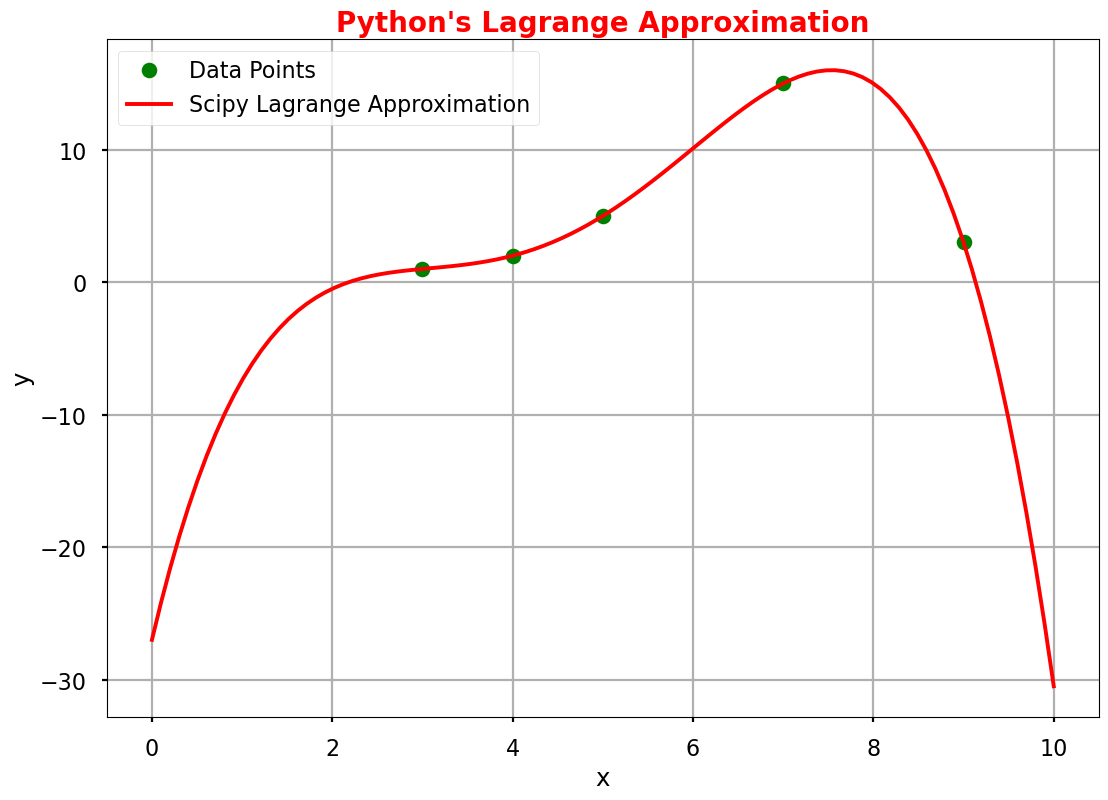

In [ ]:
x = [3, 5, 7, 9, 4]
y = [1, 5, 15, 3, 2]

x_2 = np.linspace(0,10,100)

f = lagrange(x,y)

plt.plot(x,y, 'go', label="Data Points")
plt.plot(x_2, f(x_2), 'r', label="Scipy Lagrange Approximation")
plt.legend()
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Python\'s Lagrange Approximation', fontsize=20, fontweight='bold', color='red')
plt.show()

We see that the function travels through each ordered pair of points in the data, thereby confirming that the Python function from the SciPy library has correctly approximated a mathematical function for our data points.

## Newton's Polynomial Interpolation

This method involves creating two functions to make a function to fit a set of data points.  The first is what's called a 'divided difference' function.  It calculates the coefficients for the polynomial by iterating the equation $$a_1 = \frac{y_1 - y_0}{x_1 - x_0}$$

In [ ]:
# This is the code from the book with more descriptive variable names.

def divided_difference(x,y):
    n = len(y)
    coefficients = np.zeros([n,n])
    coefficients[:,0] = y

    for j in range(1,n):
        for i in range(n-j):
            coefficients[i][j] = (coefficients[i+1][j-1] - coefficients[i][j-1]) / (x[i+j] - x[i])
    return coefficients

The second function takes these coefficients and constructs a function of the form $$f(x) = a_0 + a_1(x - x_0) + a_2(x - x_0)(x - x_1)+ ... +a_n(x - x_0)(x - x_1)...(x - x_n)= \sum_{i=0}^n a_i n_i(x)$$

In [ ]:
# Also code from the book.

def newtons_polynomial(coef, x_data, x_new):
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x_new - x_data[n - k]) * p
    return p

Now we can call the functions and make a plot using Newton's Polynomial Interpolation.

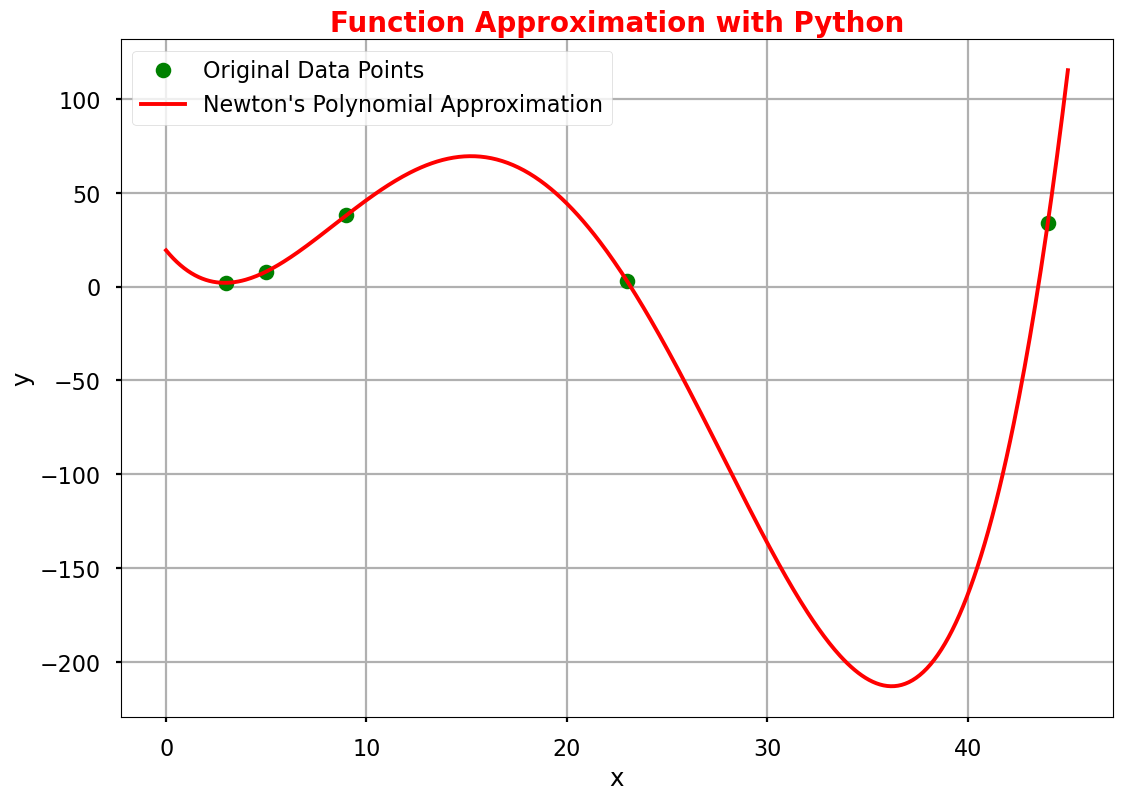

In [ ]:
# This is very close to the code from the book.
# I chose to make a nicer plot.  I hope you like it.

x = [3, 44, 23, 5, 9]
y = [2, 34, 3, 8, 38]

my_coefficients = divided_difference(x,y)[0, :]

x_new = np.linspace(0, 45, 500)
y_new = newtons_polynomial(my_coefficients, x, x_new)

plt.plot(x,y, 'go', label="Original Data Points")
plt.plot(x_new, y_new, 'r', label="Newton's Polynomial Approximation")
plt.legend()
plt.grid()
plt.title('Function Approximation with Python', fontsize=20, fontweight='bold', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

As with the Lagrange approximation, Newton's also correctly constructs a function that passes through all the submitted data points.